# Loan Prediction Project

In [4]:
# required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings as w 
w.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [5]:
train_df = pd.read_csv("loan-train.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
rows, columns = train_df.shape
print("row:",rows)
print("columns:",columns)

row: 614
columns: 13


In [10]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Removing Unwanted Columns

In [13]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
# we don't want "Loan_ID" and "Dependents" because they cannot be used for any analysis.

In [17]:
train_df.drop(train_df[['Loan_ID','Dependents']],axis=1, inplace=True)

In [19]:
train_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA (Exploratory Data Analysis)

## Handling Null values 

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [25]:
train_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
train_df.isna().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### handling null values in 'Categorical' columns 

In [30]:
col = 'Gender Married Self_Employed'.split()
for i in col:
    train_df[i].fillna(train_df[i].mode()[0],inplace=True)

In [32]:
train_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
train_df['Gender Married Self_Employed'.split()].isna().sum()
# n/a values are removed

Gender           0
Married          0
Self_Employed    0
dtype: int64

### Handling null values in 'Numerical' columns 

In [37]:
train_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
train_df.isna().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
col = 'LoanAmount Loan_Amount_Term Credit_History'.split()
for i in col:
    train_df[i].fillna(train_df[i].mean(),inplace=True)

In [43]:
train_df.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Looking for duplicate data in dataset

In [46]:
train_df[train_df[train_df.columns].duplicated() == 1]
# so there is no duplicated values in dataframe

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Visualization of Data

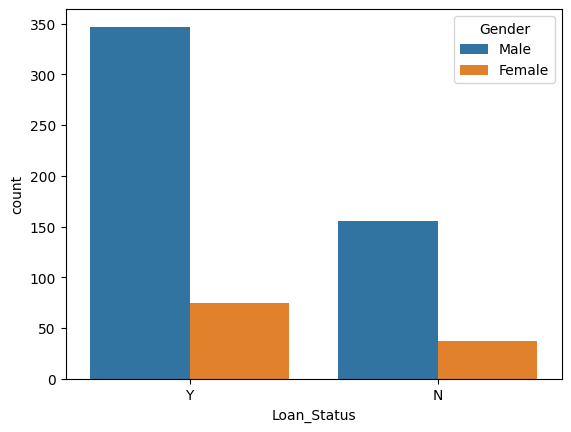

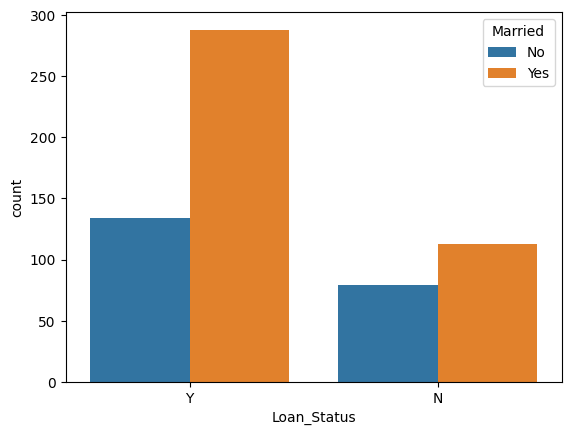

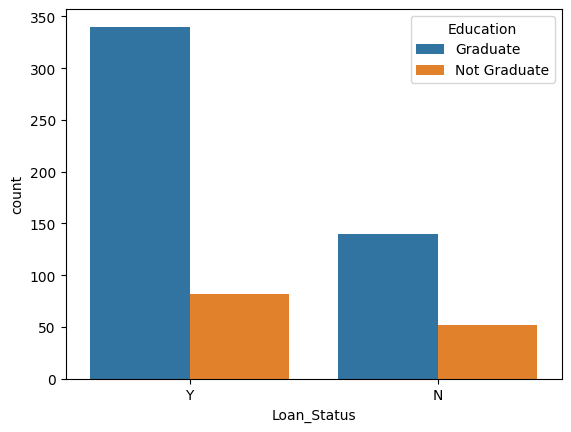

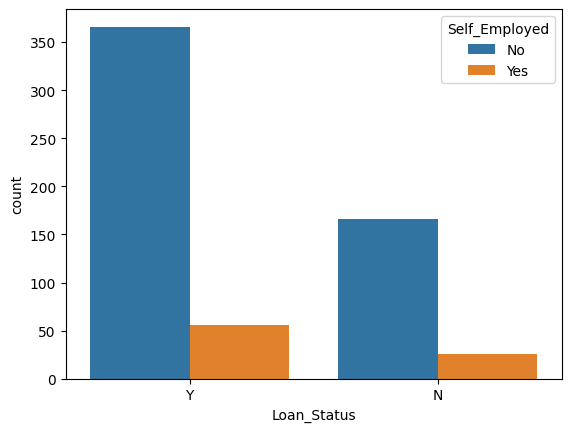

In [49]:
def plot_charts(col):
    sns.countplot(data=train_df, x='Loan_Status',hue=col)
    plt.show()
col = 'Gender Married Education Self_Employed'.split()
for i in col:
    plot_charts(i)

## Coverting Catagorical data into Numerical

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
le

LabelEncoder()

In [53]:
col = 'Gender Married Education Self_Employed Property_Area Loan_Status'.split()
for i in col:
    train_df[i] = le.fit_transform(train_df[i])
train_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Model Building

## spliting data into training and testing

In [56]:
x = train_df.drop('Loan_Status',axis=1)
y = train_df['Loan_Status']

In [60]:
x.shape, y.shape

((614, 10), (614,))

In [62]:
# spliting data into xtrain,x_test,y_train,y_test

In [64]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=45)

In [66]:
for i in [x_train,x_test,y_train,y_test]:
    print(i.shape)

(429, 10)
(185, 10)
(429,)
(185,)


## Models Training

### 1. Support Vector Machine Model using gridSearchCv

In [72]:
# using Support vector maching model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [74]:
parameters = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':['auto','scale'],
    'kernel':['rbf']
}
grid = GridSearchCV(SVC(),parameters,refit=True, verbose=3)
# refit is used to tell the best fitted parameters 
# verbose is used to tell the detail of the each parameter testing
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.698 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.698 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END .......C=1, gamma=auto, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
             verbose=3)

In [75]:
grid.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [76]:
model = SVC(C=0.1,gamma='auto',kernel='rbf')
model

SVC(C=0.1, gamma='auto')

In [77]:
model.fit(x_train,y_train)

SVC(C=0.1, gamma='auto')

In [78]:
ypred = model.predict(x_test)
# classification report 
print(classification_report(y_test,ypred))
print('Accuracy Score: ',accuracy_score(y_test,ypred) )
# accuracy is only 67% 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

Accuracy Score:  0.6702702702702703


### 2. Decision Tree model using RandomSearchCV for hyper parameter tuning

In [80]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
# parameters for decision tree model
para = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]  # Can add more random states if necessary
}

In [82]:
def random_para(para, run=20, model=DecisionTreeClassifier(random_state=1)):
    rs = RandomizedSearchCV(model,para,refit=True,n_iter=run,random_state=45)
    rs.fit(x_train,y_train)
    score = rs.best_score_
    best_para = rs.best_params_
    best_model = rs.best_estimator_

    # best fit 
    print("Best Parameters: ",best_para,'\n')

    # model score
    print("Model Score:",score,'\n')

    # creating best model with best parameters 
    model_pred = best_model.predict(x_test)
    model_pred

    # aaccuracy_score
    print('Accuracy Score: ',accuracy_score(model_pred, y_test),'\n')

    # classification report 
    print(classification_report(model_pred, y_test),'\n')

    return best_model

In [83]:
# Model for DecisionTreeClassification
random_para(para)

Best Parameters:  {'splitter': 'random', 'random_state': 42, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced'} 

Model Score: 0.8229001367989056 

Accuracy Score:  0.7783783783783784 

              precision    recall  f1-score   support

           0       0.36      0.92      0.52        24
           1       0.98      0.76      0.86       161

    accuracy                           0.78       185
   macro avg       0.67      0.84      0.69       185
weighted avg       0.90      0.78      0.81       185
 



DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.1, random_state=42,
                       splitter='random')

In [92]:
# Model for RandomForestClassification 
from sklearn.ensemble import RandomForestClassifier
para={
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth': [None, 2, 4, 6, 8, 10, 20],
}
random_para(para, model=RandomForestClassifier(random_state=2))

Best Parameters:  {'min_samples_leaf': 6, 'min_impurity_decrease': 0.01, 'max_features': 0.7, 'max_depth': 6} 

Model Score: 0.8229001367989056 

Accuracy Score:  0.7783783783783784 

              precision    recall  f1-score   support

           0       0.36      0.92      0.52        24
           1       0.98      0.76      0.86       161

    accuracy                           0.78       185
   macro avg       0.67      0.84      0.69       185
weighted avg       0.90      0.78      0.81       185
 



RandomForestClassifier(max_depth=6, max_features=0.7,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       random_state=2)

In [93]:
# Model for LogisticRegression 
from sklearn.linear_model import LogisticRegression
para={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # Solver used for optimization
    'max_iter': [100, 200, 300, 400, 500],  # Maximum iterations for solver
    'l1_ratio': [0.0, 0.1, 0.5, 0.7, 1.0],  # Only used if penalty='elasticnet'
    'class_weight': [None, 'balanced'],  # Weighting of classes
}
random_para(para, model=LogisticRegression(random_state=3))

Best Parameters:  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'l1_ratio': 0.1, 'class_weight': None, 'C': 100} 

Model Score: 0.8229001367989056 

Accuracy Score:  0.7783783783783784 

              precision    recall  f1-score   support

           0       0.36      0.92      0.52        24
           1       0.98      0.76      0.86       161

    accuracy                           0.78       185
   macro avg       0.67      0.84      0.69       185
weighted avg       0.90      0.78      0.81       185
 



LogisticRegression(C=100, l1_ratio=0.1, random_state=3, solver='newton-cg')

In [95]:
# Model for GaussianNB
from sklearn.naive_bayes import GaussianNB
para={
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Portion of the largest variance of all features added to variances for stability
}
random_para(para, model=GaussianNB())

Best Parameters:  {'var_smoothing': 1e-09} 

Model Score: 0.8089192886456908 

Accuracy Score:  0.7783783783783784 

              precision    recall  f1-score   support

           0       0.41      0.83      0.55        30
           1       0.96      0.77      0.85       155

    accuracy                           0.78       185
   macro avg       0.68      0.80      0.70       185
weighted avg       0.87      0.78      0.80       185
 



GaussianNB()

In [96]:
# Model for SVC
from sklearn.svm import SVC
para={
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['rbf'],  # Specifies the kernel type to be used
    'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel function (only for 'poly' kernel)
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5, 1.0],  # Independent term in kernel function (used in 'poly' and 'sigmoid')
    'class_weight': [None, 'balanced'],  # Whether to adjust weights for imbalanced classes
    'probability': [True, False],  # Whether to enable probability estimates
}
random_para(para, model=SVC(random_state=5))

Best Parameters:  {'probability': True, 'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, 'coef0': 1.0, 'class_weight': None, 'C': 1000} 

Model Score: 0.6969904240766074 

Accuracy Score:  0.6648648648648648 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.67      0.80       184

    accuracy                           0.66       185
   macro avg       0.50      0.33      0.40       185
weighted avg       0.99      0.66      0.79       185
 



SVC(C=1000, coef0=1.0, gamma=0.01, probability=True, random_state=5)

### Best model with Good Accuracy is :  

- We are taking "Decision Tree" Model and It have the Accuracy Score of 77.8 %

# Extracing the DecisionTreeClassification model using "joblib"

In [101]:
# we are doing this because we need the Model in a variable
ds = DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.1, random_state=42,
                       splitter='random')
print(ds.fit(x_train,y_train))
ypred = ds.predict(x_test)
print("Accuracy Score:",accuracy_score(ypred,y_test))

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.1, random_state=42,
                       splitter='random')
Accuracy Score: 0.7783783783783784


## Using Joblib to Export the model in pkl file

In [108]:
import joblib 
joblib.dump(ds,'model.pkl')

['model.pkl']

In [110]:
# using the model.pkl 

In [112]:
import joblib
model = joblib.load('model.pkl')
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1])

In [114]:
x_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
399,0,0,0,0,1500,1800.0,103.0,360.0,0.0,1
239,1,1,0,0,3315,0.0,96.0,360.0,1.0,1
61,1,1,0,0,3029,0.0,99.0,360.0,1.0,2
543,1,1,1,0,2239,2524.0,128.0,360.0,1.0,2
301,1,1,1,0,2875,1750.0,105.0,360.0,1.0,1


In [147]:
model.predict([[1,1,1,1,0,0,1,0,1,0]])

array([1])